<a href="https://colab.research.google.com/github/Arthur6363/Data-Science-ML/blob/main/Do%C4%9Fal_dil_i%C5%9Fleme_restorant_tahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np

In [94]:
yorumlar = pd.read_csv("restorant")
yorumlar.head()

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0


In [95]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [96]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
import re

derlem = []
for i in range(1000):
  yorum = re.sub("[^a-zA-Z]", " ", yorumlar["Review"][i])   ##noktalama işaretlerini attık
  yorum = yorum.lower()
  yorum = yorum.split()
  yorum = [ps.stem(kelime) for kelime in yorum if kelime not in set(stopwords.words("english"))]
  yorum = " ".join(yorum)
  derlem.append(yorum)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
x = cv.fit_transform(derlem).toarray()
y = yorumlar["Liked"].values

In [124]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [134]:
model.score(x_test,y_test)

0.685

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[52, 39,  0,  6,  1],
       [14, 85,  0,  1,  0],
       [ 1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

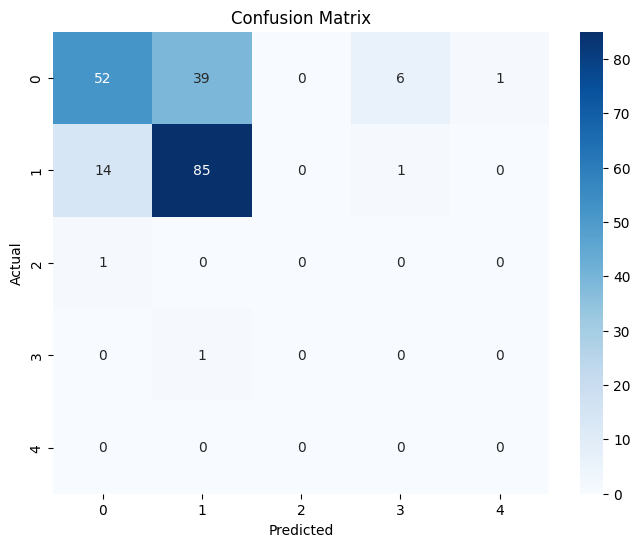

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
